Importing the necessary libraries

In [1]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

Load Data dan Menampilkan Data

In [2]:
df= pd.read_csv('cervical_cancer.csv')
df.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,...,STDs.HPV,STDs..Number.of.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Hinselmann,Schiller,Citology,class_label
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
3,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,3,23,2,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Melihat jumlah baris dan kolom
df.shape

(668, 34)

In [4]:
# Tipe data setiap kolom
df.dtypes

Age                                     int64
Number.of.sexual.partners               int64
First.sexual.intercourse                int64
Num.of.pregnancies                      int64
Smokes                                  int64
Smokes..years.                        float64
Smokes..packs.year.                   float64
Hormonal.Contraceptives                 int64
Hormonal.Contraceptives..years.       float64
IUD                                     int64
IUD..years.                           float64
STDs                                    int64
STDs..number.                           int64
STDs.condylomatosis                     int64
STDs.cervical.condylomatosis            int64
STDs.vaginal.condylomatosis             int64
STDs.vulvo.perineal.condylomatosis      int64
STDs.syphilis                           int64
STDs.pelvic.inflammatory.disease        int64
STDs.genital.herpes                     int64
STDs.molluscum.contagiosum              int64
STDs.AIDS                         

MISSING VALUE (Data Cleaning = Mengganti nilai yang null dengan nilai rata-rata yang paling sering muncul di komlom tersebut)

In [5]:
# Presentase missing value

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
class_label,0,0.0
Hormonal.Contraceptives..years.,0,0.0
STDs.cervical.condylomatosis,0,0.0
STDs.condylomatosis,0,0.0
STDs..number.,0,0.0


In [6]:
#Mean, Median, Minimum , Maximum 

df.describe()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,...,STDs.HPV,STDs..Number.of.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Hinselmann,Schiller,Citology,class_label
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,...,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,...,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


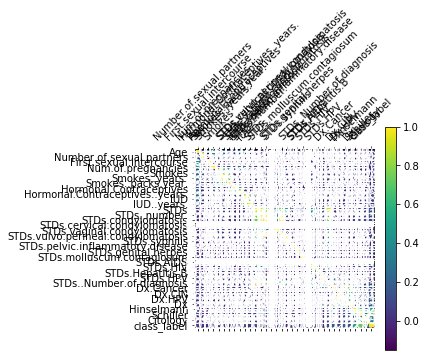

In [7]:
# Korelasi

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


In [8]:
X = df.drop(['class_label'], axis=1)
Y = df['class_label']

In [9]:
X.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,...,STDs.Hepatitis.B,STDs.HPV,STDs..Number.of.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Hinselmann,Schiller,Citology
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,0,1,0,1,0,0,0,0
3,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,3,23,2,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Splitting data ke test data dan training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(Y_train.shape)

(467, 33)
(467,)


In [11]:
from sklearn import preprocessing

categorical = ['Age','Number.of.sexual.partners','First.sexual.intercourse','Num.of.pregnancies','Smokes','Smokes..years.','Smokes..packs.year.',
'Hormonal.Contraceptives','Hormonal.Contraceptives..years.','IUD','IUD..years.','STDs','STDs..number.','STDs.condylomatosis','STDs.cervical.condylomatosis','STDs.vaginal.condylomatosis',
'STDs.vulvo.perineal.condylomatosis','STDs.syphilis','STDs.pelvic.inflammatory.disease','STDs.genital.herpes','STDs.molluscum.contagiosum','STDs.AIDS','STDs.HIV','STDs.Hepatitis.B',
'STDs.HPV','STDs..Number.of.diagnosis','Dx.Cancer','Dx.CIN','Dx.HPV','Dx','Hinselmann','Schiller','Citology']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [12]:
# Menggunakan StandardScalar untuk normalisasi data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [13]:
X_train.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,...,STDs.Hepatitis.B,STDs.HPV,STDs..Number.of.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Hinselmann,Schiller,Citology
0,0.711252,0.393813,-0.409707,1.175927,2.464905,3.421670,2.286752,0.749582,0.362470,-0.350137,...,-0.046324,-0.065583,2.713239,-0.169217,0.0,-0.1624,-0.140181,-0.205939,3.267262,4.204759
1,-0.144502,-0.350764,0.615292,-0.925442,-0.405695,-0.336484,-0.346819,-1.334077,-0.994433,-0.350137,...,-0.046324,-0.065583,-0.310825,-0.169217,0.0,-0.1624,-0.140181,-0.205939,-0.306067,-0.237826
2,0.589001,-0.350764,1.298625,-0.224986,-0.405695,-0.336484,-0.346819,-1.334077,-0.994433,-0.350137,...,-0.046324,-0.065583,-0.310825,-0.169217,0.0,-0.1624,-0.140181,-0.205939,-0.306067,-0.237826
3,-0.266752,0.393813,-0.751374,-0.224986,-0.405695,-0.336484,-0.346819,0.749582,1.606299,-0.350137,...,-0.046324,-0.065583,-0.310825,-0.169217,0.0,-0.1624,-0.140181,-0.205939,-0.306067,-0.237826
4,-0.266752,-1.095341,2.323625,-0.925442,-0.405695,-0.336484,-0.346819,0.749582,-0.881358,-0.350137,...,-0.046324,-0.065583,-0.310825,-0.169217,0.0,-0.1624,-0.140181,-0.205939,-0.306067,-0.237826


In [14]:
# Decision Tree 

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [15]:
# Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [16]:
# KNN 2
classifier1 = KNeighborsClassifier(n_neighbors=2)
classifier1.fit(X_train, Y_train)
Y_pred = classifier1.predict(X_test)
acc_knn2 = round(classifier1.score(X_train, Y_train) * 100, 2)


In [17]:
# KNN 3
classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(X_train, Y_train)
Y_pred = classifier2.predict(X_test)
acc_knn3 = round(classifier2.score(X_train, Y_train) * 100, 2)


In [18]:
# KNN 4
classifier3 = KNeighborsClassifier(n_neighbors=4)
classifier3.fit(X_train, Y_train)
Y_pred = classifier3.predict(X_test)
acc_knn4 = round(classifier3.score(X_train, Y_train) * 100, 2)


In [19]:
# KNN 5
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit(X_train, Y_train)
Y_pred = classifier4.predict(X_test)
acc_knn5 = round(classifier4.score(X_train, Y_train) * 100, 2)


In [20]:
# SVM

svm1 = svm.SVC()
svm1.fit(X_train, Y_train)
Y_pred = svm1.predict(X_test)
acc_svm = round(svm1.score(X_train, Y_train) * 100, 2)

In [21]:
# Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [22]:
# Akurasi

results = pd.DataFrame({
    'Model': ['Decision Tree','Naive Bayes', 'KNN K=2','KNN K=3','KNN K=4','KNN K=5','SVM','Random Forest'],
    'Score': [acc_decision_tree,acc_gaussian,acc_knn2, acc_knn3, acc_knn4, acc_knn5, acc_svm, acc_random_forest ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Decision Tree
100.00,Random Forest
98.72,SVM
97.64,KNN K=3
96.79,KNN K=2
95.93,KNN K=4
95.93,KNN K=5
10.49,Naive Bayes
